### Kendi ortamınızda çalıştırmadan önce dosya yollarına dikkat edin

# Verisetini indir

In [ ]:
# Kaggle API anahtarını yüklüyoruz
from google.colab import files
files.upload()  # Buradan kaggle.json dosyasını yükle

In [ ]:
# Gerekli dizinleri oluştur
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json  # Güvenlik izni ver

# Kaggle CLI'yı yükle (çoğu zaman ön yüklüdür ama yine de ekleyelim)
!pip install -q kaggle

In [ ]:
!kaggle datasets download -d "youcefattallah97/minerals-identification-classification" -p "/content/drive/Shareddrives/Staj/Mineral_ViT"

Dataset URL: https://www.kaggle.com/datasets/youcefattallah97/minerals-identification-classification
License(s): DbCL-1.0
 96% 769M/803M [00:01<00:00, 317MB/s]
100% 803M/803M [00:04<00:00, 194MB/s]


In [ ]:
!unzip -q "/content/drive/Shareddrives/Staj/Mineral_ViT/mineral-photos.zip" -d "/content/drive/Shareddrives/Staj/Mineral_ViT/"

replace /content/drive/Shareddrives/Staj/Mineral_ViT/data/azurite/image_0014066.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

 # 2. Gerekli Kütüphaneleri Kur

In [ ]:
!unzip -q "/content/drive/Shareddrives/Staj/Mineral_ViT/minerals-identification-classification.zip" -d "/content"

In [ ]:
!pip install transformers datasets timm torchvision torchaudio --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 96.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 55.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 44.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 108.9 MB/s eta 0:00:00


In [ ]:
pip install -U datasets huggingface_hub fsspec --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 515.4/515.4 kB 39.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 18.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.


In [ ]:
import os
from datasets import load_dataset
from transformers import ViTForImageClassification, ViTImageProcessor, TrainingArguments, Trainer
from torchvision import transforms
import torch


#  3. Görüntüleri Dataset’e Dönüştür (HuggingFace load_dataset ile)

In [ ]:
dataset_path = "/content/Minet 5640 Images"

dataset = load_dataset(dataset_path)

Resolving data files:   0%|          | 0/5642 [00:00<?, ?it/s]

Generating train split: 0 examples [00:00, ? examples/s]

# 4. Görüntü İşleme (Resize, Normalize, vs.)

In [ ]:
# ViT modeline uygun feature extractor
processor = ViTImageProcessor.from_pretrained("google/vit-base-patch16-224-in21k")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


preprocessor_config.json:   0%|          | 0.00/160 [00:00<?, ?B/s]

In [ ]:
def transform(example):
    image = example["image"].convert("RGB")
    image = processor(images=image, return_tensors="pt")["pixel_values"][0]
    example["pixel_values"] = image
    return example

# Görselleri dönüştür
dataset = dataset.map(transform, batched=False)

Map:   0%|          | 0/5642 [00:00<?, ? examples/s]

 # 5. Dataset’i Train/Validation Olarak Ayır

In [ ]:
dataset = dataset["train"].train_test_split(test_size=0.1, seed=42)
train_ds = dataset["train"]
val_ds = dataset["test"]


# 6. Modeli Yükle ve Sınıf Sayısını Belirle

In [ ]:
labels = train_ds.features["label"].names  # klasör isimleri
num_labels = len(labels)

model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224-in21k",
    num_labels=num_labels,
    id2label={i: label for i, label in enumerate(labels)},
    label2id={label: i for i, label in enumerate(labels)}
)


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


# 7. Eğitim Ayarlarını Belirle

In [ ]:
training_args = TrainingArguments(
    output_dir="/content/drive/Shareddrives/Staj/Mineral_ViT/models/v1",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=5,
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    logging_dir="./logs",
    learning_rate=2e-5,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none"
)


#  8. Değerlendirme Metriği (Accuracy)

In [ ]:
!pip install evaluate -q

In [ ]:
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(p):
    preds = p.predictions.argmax(axis=1)
    return accuracy.compute(predictions=preds, references=p.label_ids)


#  9. Trainer ile Eğitimi Başlat

In [ ]:
import os
os.environ["WANDB_DISABLED"] = "true"

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=processor,
    compute_metrics=compute_metrics
)

trainer.train()

/tmp/ipython-input-41-3674918941.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
1,1.168700,0.643851,0.860177
2,0.443100,0.362109,0.925664
3,0.246900,0.279407,0.938053
4,0.168000,0.241736,0.939823
5,0.134200,0.225434,0.946903


TrainOutput(global_step=1590, training_loss=0.4321823743904162, metrics={'train_runtime': 2885.3598, 'train_samples_per_second': 8.798, 'train_steps_per_second': 0.551, 'total_flos': 1.9672223103725875e+18, 'train_loss': 0.4321823743904162, 'epoch': 5.0})

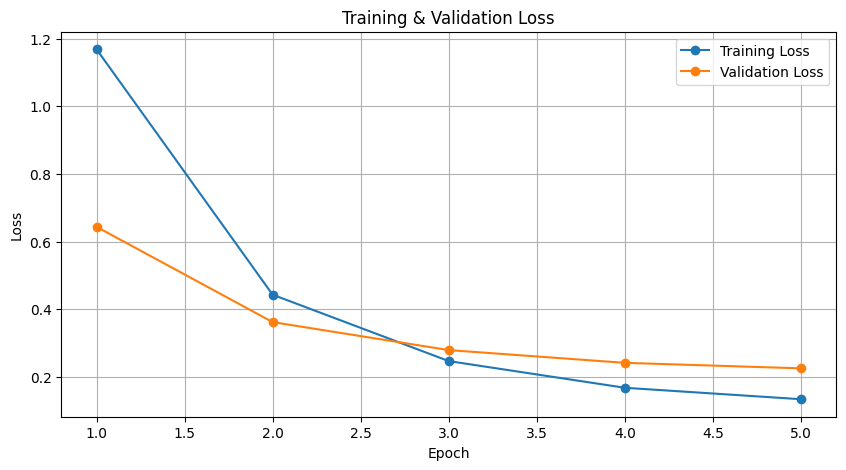

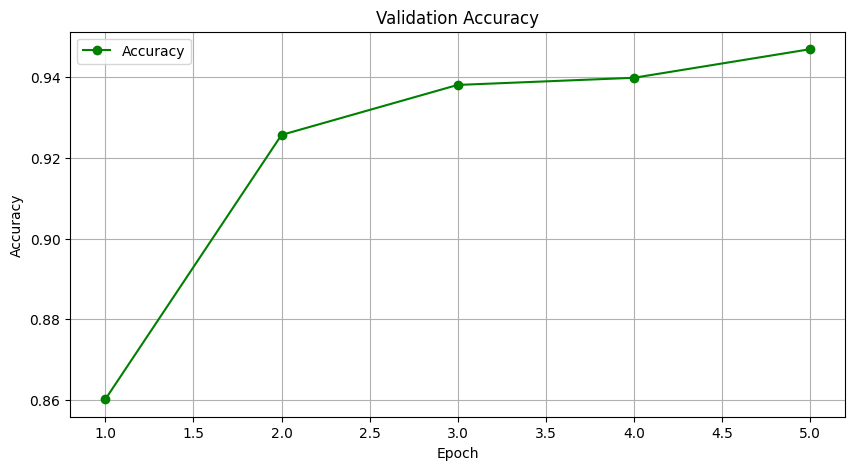

In [ ]:
import matplotlib.pyplot as plt

# Epoch numaraları
epochs = [1, 2, 3, 4, 5]

# Loss ve Accuracy değerleri
train_loss = [1.1687, 0.4431, 0.2469, 0.1680, 0.1342]
val_loss = [0.643851, 0.362109, 0.279407, 0.241736, 0.225434]
accuracy = [0.860177, 0.925664, 0.938053, 0.939823, 0.946903]

# Grafik oluşturma
plt.figure(figsize=(10,5))

# Lossları aynı grafikte çiz
plt.plot(epochs, train_loss, label="Training Loss", marker='o')
plt.plot(epochs, val_loss, label="Validation Loss", marker='o')

plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Accuracy için ayrı grafik
plt.figure(figsize=(10,5))
plt.plot(epochs, accuracy, label="Accuracy", color='green', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


# 10. Modeli Kaydetme

In [ ]:
trainer.save_model("/content/drive/Shareddrives/Staj/Mineral_ViT/models/v1/best_final_model")


# 11. Tek Görüntü ile Tahmin (Opsiyonel)

In [ ]:
from PIL import Image

img = Image.open("/content/drive/Shareddrives/Staj/Mineral_ViT/data/Quartz/example1.jpg").convert("RGB")
inputs = processor(images=img, return_tensors="pt").to(model.device)
outputs = model(**inputs)
pred = outputs.logits.argmax(-1)
print("Tahmin edilen sınıf:", model.config.id2label[pred.item()])


# 12. Model Performansı

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Trainer üzerinden tahmin al
predictions = trainer.predict(val_ds)

# En yüksek olasılığa sahip sınıfı seç
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids


In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, digits=4))


              precision    recall  f1-score   support

           0     0.9167    1.0000    0.9565        99
           1     0.9535    0.8367    0.8913        49
           2     0.9615    0.9091    0.9346        55
           3     0.9583    0.9892    0.9735        93
           4     0.9091    0.8571    0.8824        35
           5     0.9381    0.9725    0.9550       109
           6     0.9750    0.9360    0.9551       125

    accuracy                         0.9469       565
   macro avg     0.9446    0.9287    0.9355       565
weighted avg     0.9476    0.9469    0.9463       565



In [ ]:
from transformers import ViTForImageClassification, ViTImageProcessor, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Model ve Processor Yükle
model_path = "/content/drive/Shareddrives/Staj/Mineral_ViT/models/v1/best_final_model"  # 🔁 kendi model klasörünü yaz
model = ViTForImageClassification.from_pretrained(model_path)
processor = ViTImageProcessor.from_pretrained(model_path)

# 2. Trainer Ayarları
training_args = TrainingArguments(
    output_dir="./tmp",
    report_to="none"  # wandb, tensorboard gibi şeyleri devre dışı bırakır
)

# 3. Trainer Nesnesi
trainer = Trainer(
    model=model,
    args=training_args
)

# 4. Validation Dataset üzerinden tahmin yap
predictions = trainer.predict(val_ds)

# 5. Tahmin ve Gerçek Etiketleri Al
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# 6. Accuracy Hesapla
acc = accuracy_score(y_true, y_pred)
print(f"\n📊 Validation Accuracy: {acc:.4f}")



📊 Validation Accuracy: 0.9469


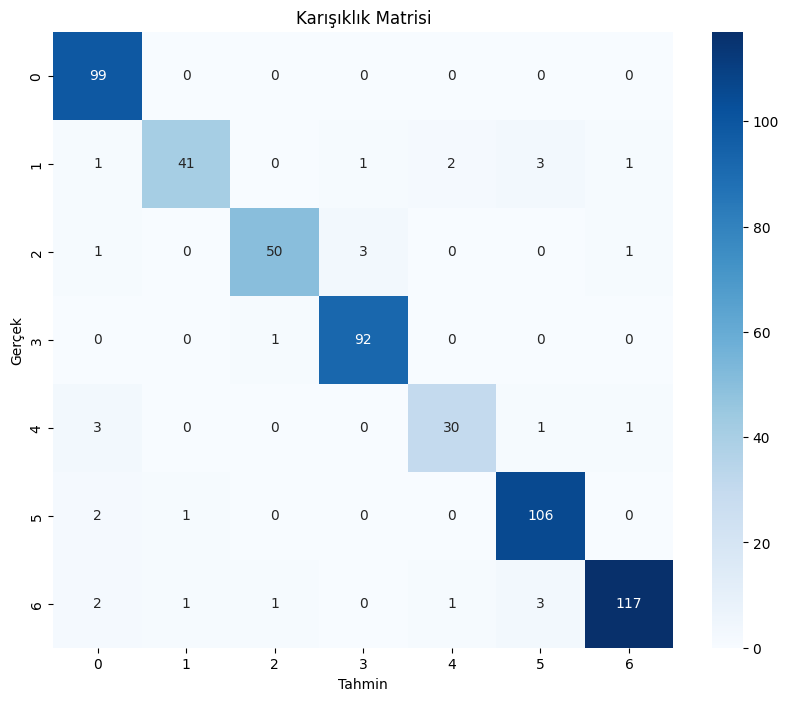

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi")
plt.show()


# 13.Test Et

In [ ]:
from PIL import Image
import torch
from transformers import ViTForImageClassification, ViTImageProcessor

# Model ve processor yükle
model_path = "/content/drive/Shareddrives/Staj/Mineral_ViT/models/v1/best_final_model"
model = ViTForImageClassification.from_pretrained(model_path)
processor = ViTImageProcessor.from_pretrained(model_path)

# Görüntüyü yükle
image = Image.open("/content/Minet 5640 Images/bornite/C2_02__04.jpg").convert("RGB")

# Görüntüyü işle
inputs = processor(images=image, return_tensors="pt")

# Model tahmini
model.eval()
with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    predicted_idx = logits.argmax(-1).item()

# Sınıf adı
predicted_label = model.config.id2label[predicted_idx]
print(f"Modelin tahmini: {predicted_label}")


Modelin tahmini: bornite


# 14. Eğitime Devam Et

In [ ]:
import evaluate
accuracy = evaluate.load("accuracy")

def compute_metrics(p):
    preds = p.predictions.argmax(axis=1)
    return accuracy.compute(predictions=preds, references=p.label_ids)


In [ ]:
from transformers import TrainingArguments, Trainer
from transformers import ViTForImageClassification, ViTImageProcessor

checkpoint_path = "/content/drive/Shareddrives/Staj/Mineral_ViT/models/v1/checkpoint-1590"  # kaydettiğin en son checkpoint klasörü


model = ViTForImageClassification.from_pretrained(checkpoint_path)
processor = ViTImageProcessor.from_pretrained(checkpoint_path)

training_args = TrainingArguments(
    output_dir="/content/drive/Shareddrives/Staj/Mineral_ViT/models/v2",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=8,  # kaldığın yerden 2 epoch daha
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none"
)

trainer = Trainer(
    model=model,  # modeli daha önce yüklemiş olmalısın
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=processor,
    compute_metrics=compute_metrics
)

trainer.train(resume_from_checkpoint=checkpoint_path)

/tmp/ipython-input-78-108250596.py:24: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
6,0.125000,0.219906,0.946903
7,0.103400,0.193269,0.952212
8,0.092500,0.191163,0.955752


TrainOutput(global_step=2544, training_loss=0.04010270001753321, metrics={'train_runtime': 1751.7775, 'train_samples_per_second': 23.186, 'train_steps_per_second': 1.452, 'total_flos': 3.14755569659614e+18, 'train_loss': 0.04010270001753321, 'epoch': 8.0})

In [ ]:
trainer.save_model("/content/drive/Shareddrives/Staj/Mineral_ViT/models/v2/best_final_model")

# 14.2 Eğitime Devam Et

In [ ]:
from transformers import TrainingArguments, Trainer
from transformers import ViTForImageClassification, ViTImageProcessor

checkpoint_path = "/content/drive/Shareddrives/Staj/Mineral_ViT/models/v2/checkpoint-2544"  # kaydettiğin en son checkpoint klasörü


model = ViTForImageClassification.from_pretrained(checkpoint_path)
processor = ViTImageProcessor.from_pretrained(checkpoint_path)

training_args = TrainingArguments(
    output_dir="/content/drive/Shareddrives/Staj/Mineral_ViT/models/v3",
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=10,  # kaldığın yerden 2 epoch daha
    eval_strategy="epoch",
    save_strategy="epoch",
    logging_strategy="epoch",
    logging_dir="./logs",
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none"
)

trainer = Trainer(
    model=model,  # modeli daha önce yüklemiş olmalısın
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=processor,
    compute_metrics=compute_metrics
)

trainer.train(resume_from_checkpoint=checkpoint_path)

/tmp/ipython-input-80-396304867.py:24: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy
9,0.089000,0.185764,0.953982
10,0.081400,0.181166,0.957522


TrainOutput(global_step=3180, training_loss=0.01703354097762198, metrics={'train_runtime': 1180.9676, 'train_samples_per_second': 42.99, 'train_steps_per_second': 2.693, 'total_flos': 3.934444620745175e+18, 'train_loss': 0.01703354097762198, 'epoch': 10.0})

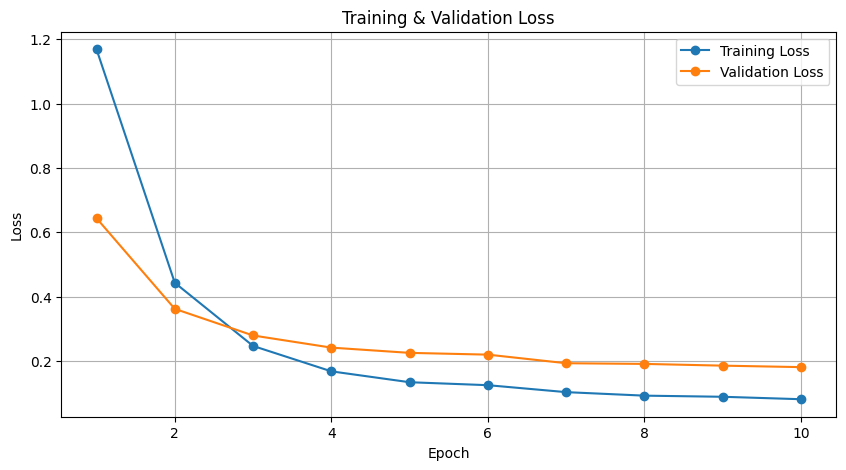

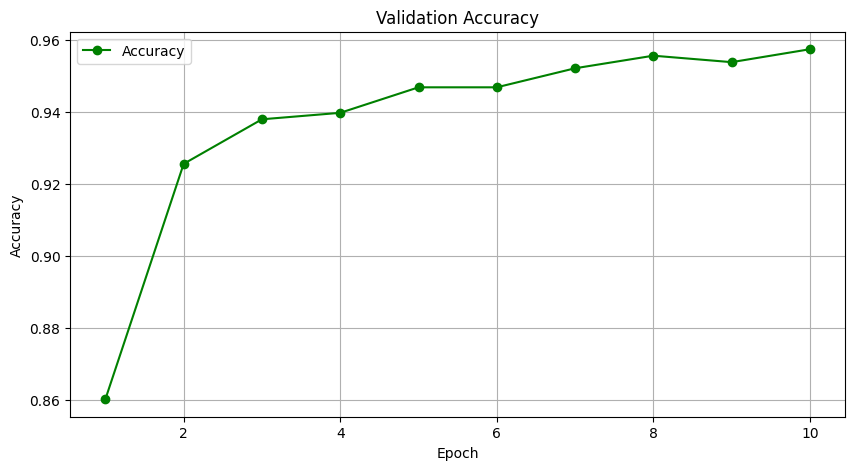

In [ ]:
import matplotlib.pyplot as plt

# Tüm epoch numaraları
epochs = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Güncel Loss ve Accuracy değerleri
train_loss = [1.1687, 0.4431, 0.2469, 0.1680, 0.1342, 0.1250, 0.1034, 0.0925, 0.0890, 0.0814]
val_loss   = [0.6438, 0.3621, 0.2794, 0.2417, 0.2254, 0.2199, 0.1932, 0.1911, 0.1857, 0.1811]
accuracy   = [0.8601, 0.9256, 0.9380, 0.9398, 0.9469, 0.9469, 0.9522, 0.9557, 0.9539, 0.9575]

# Loss grafiği
plt.figure(figsize=(10,5))
plt.plot(epochs, train_loss, label="Training Loss", marker='o')
plt.plot(epochs, val_loss, label="Validation Loss", marker='o')
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training & Validation Loss")
plt.legend()
plt.grid(True)
plt.show()

# Accuracy grafiği
plt.figure(figsize=(10,5))
plt.plot(epochs, accuracy, label="Accuracy", color='green', marker='o')
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Validation Accuracy")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
model.save_pretrained("/content/drive/Shareddrives/Staj/Mineral_ViT/models/v3/best_final_model")
processor.save_pretrained("/content/drive/Shareddrives/Staj/Mineral_ViT/models/v3/best_final_model")

['/content/drive/Shareddrives/Staj/Mineral_ViT/models/v3/best_final_model/preprocessor_config.json']

# 15.Test Et

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Trainer üzerinden tahmin al
predictions = trainer.predict(val_ds)

# En yüksek olasılığa sahip sınıfı seç
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.9340    1.0000    0.9659        99
           1     0.9556    0.8776    0.9149        49
           2     0.9630    0.9455    0.9541        55
           3     0.9684    0.9892    0.9787        93
           4     0.9688    0.8857    0.9254        35
           5     0.9381    0.9725    0.9550       109
           6     0.9833    0.9440    0.9633       125

    accuracy                         0.9575       565
   macro avg     0.9587    0.9449    0.9510       565
weighted avg     0.9582    0.9575    0.9572       565



In [ ]:
from transformers import ViTForImageClassification, ViTImageProcessor, Trainer, TrainingArguments
from sklearn.metrics import accuracy_score
import numpy as np

# 1. Model ve Processor Yükle
model_path = "/content/drive/Shareddrives/Staj/Mineral_ViT/models/v3/best_final_model"  # 🔁 kendi model klasörünü yaz
model = ViTForImageClassification.from_pretrained(model_path)
processor = ViTImageProcessor.from_pretrained(model_path)

# 2. Trainer Ayarları
training_args = TrainingArguments(
    output_dir="./tmp",
    report_to="none"  # wandb, tensorboard gibi şeyleri devre dışı bırakır
)

# 3. Trainer Nesnesi
trainer = Trainer(
    model=model,
    args=training_args
)

# 4. Validation Dataset üzerinden tahmin yap
predictions = trainer.predict(val_ds)

# 5. Tahmin ve Gerçek Etiketleri Al
y_pred = np.argmax(predictions.predictions, axis=1)
y_true = predictions.label_ids

# 6. Accuracy Hesapla
acc = accuracy_score(y_true, y_pred)
print(f"\n📊 Validation Accuracy: {acc:.4f}")



📊 Validation Accuracy: 0.9575


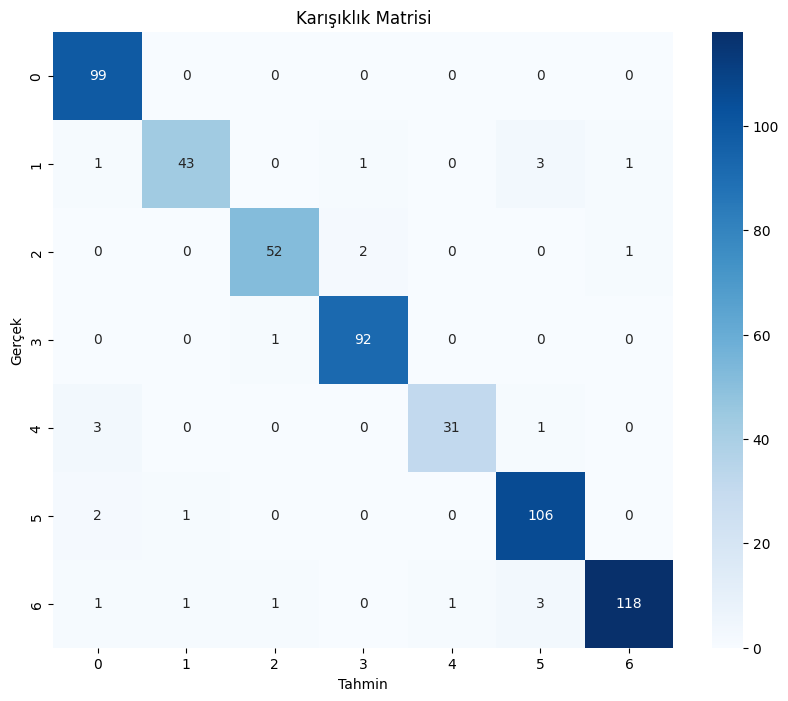

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Karışıklık Matrisi")
plt.show()
